# https://www.ricequant.com/community/topic/788/

In [24]:
from hmmlearn.hmm import GaussianHMM
import numpy as np
import seaborn as sns
from matplotlib import cm, pyplot as plt
%matplotlib inline
import matplotlib.dates as dates
import pandas as pd
import datetime

In [123]:
begin_date="2016-01-01"
end_date="2017-12-01"
column_map={u"日期":"MDEntryDate",u"股票代码":"stockcode",u"名称":"name",u"收盘价":"ClosingPx",u"最高价":"HighPx",u"最低价":"LowPx"
            ,u"开盘价":"OpeningPx",u"前收盘":"forClosePx",u"涨跌额":"updown",u"涨跌幅":"updownpercent",u"成交量":"TotalTurnover"
           ,u"成交金额":"TotalVolumeTraded"}

df=pd.read_csv("./shanghai300_utf8.csv",encoding="utf-8")
df.rename(columns=column_map,inplace=True)

df.set_index("MDEntryDate",inplace=True)
df1=df.sort_index()
df=df1[df1.TotalTurnover>0]


In [78]:
df.head(10)

,stockcode,name,ClosingPx,HighPx,LowPx,OpeningPx,forClosePx,updown,updownpercent,TotalTurnover,TotalVolumeTraded
MDEntryDate,,,,,,,,,,,
2005/1/10,'399300,沪深300,993.88,993.96,979.79,983.76,983.96,9.92,1.0082,579169800,3.762930e+09
2005/1/11,'399300,沪深300,997.14,999.55,991.09,994.19,993.88,3.26,0.328,584908000,3.704080e+09
2005/1/12,'399300,沪深300,996.75,996.98,989.26,996.65,997.14,-0.39,-0.0391,501452500,3.093300e+09
2005/1/13,'399300,沪深300,996.88,999.47,992.70,996.08,996.75,0.13,0.013,604406600,3.842170e+09
2005/1/14,'399300,沪深300,988.31,1006.46,987.23,996.62,996.88,-8.57,-0.8597,729784200,4.162920e+09
2005/1/17,'399300,沪深300,967.45,981.53,965.08,979.11,988.31,-20.86,-2.1107,728818900,4.249810e+09
2005/1/18,'399300,沪深300,974.69,974.87,960.29,967.37,967.45,7.24,0.7484,731184800,4.117940e+09
2005/1/19,'399300,沪深300,967.21,974.33,965.26,974.33,974.69,-7.48,-0.7674,633809100,3.427950e+09
2005/1/20,'399300,沪深300,956.25,963.21,952.23,963.21,967.21,-10.96,-1.1332,772710600,4.399350e+09


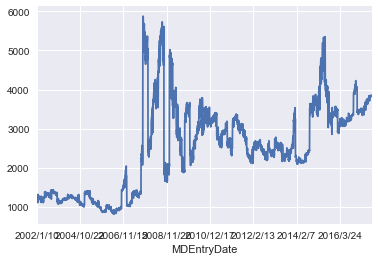

In [65]:
close=df1["ClosingPx"]
close.plot(grid=True)

In [86]:
n=6 #6个隐藏状态
volumne=df["TotalVolumeTraded"]
close=df["ClosingPx"]
logDel=np.log(np.array(df['HighPx']))-np.log(np.array(df['LowPx']))

logRet_1=np.array(np.diff(np.log(close)))
logRet_5=np.log(np.array(close[5:]))-np.log(np.array(close[:-5]))

logVol_5=np.log(np.array(volumne[5:]))-np.log(np.array(volumne[:-5]))


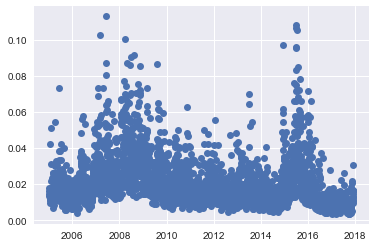

In [109]:
sns.plt.plot_date(Date,logDel)

In [87]:
logDel=logDel[5:]
logRet_1=logRet_1[4:]
close=close[5:]
Date=pd.DataFrame(df.index[5:])
A=np.column_stack([logDel,logRet_5,logVol_5])
A

array([[ 0.01690158, -0.02695273,  0.12167637],
       [ 0.01506881, -0.02277171,  0.10591812],
       [ 0.00935256, -0.03008435,  0.10272393],
       ..., 
       [ 0.00698726,  0.00736575,  0.35850813],
       [ 0.00763025,  0.00191644,  0.29626582],
       [ 0.00758402, -0.0027437 ,  0.15168459]])

In [111]:
np.diff([1,2,3,6,5])

array([ 1,  1,  3, -1])

In [88]:
model=GaussianHMM(n_components=n,covariance_type="full",n_iter=2000).fit(A)
hidden_states=model.predict(A)
hidden_states

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:70: DeprecationWarning: Function distribute_covar_matrix_to_match_covariance_type is deprecated; The functon distribute_covar_matrix_to_match_covariance_typeis deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:70: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:70: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:70

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:70: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:70: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:70: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:70: DeprecationWarning: Function l

array([0, 0, 0, ..., 2, 2, 2])

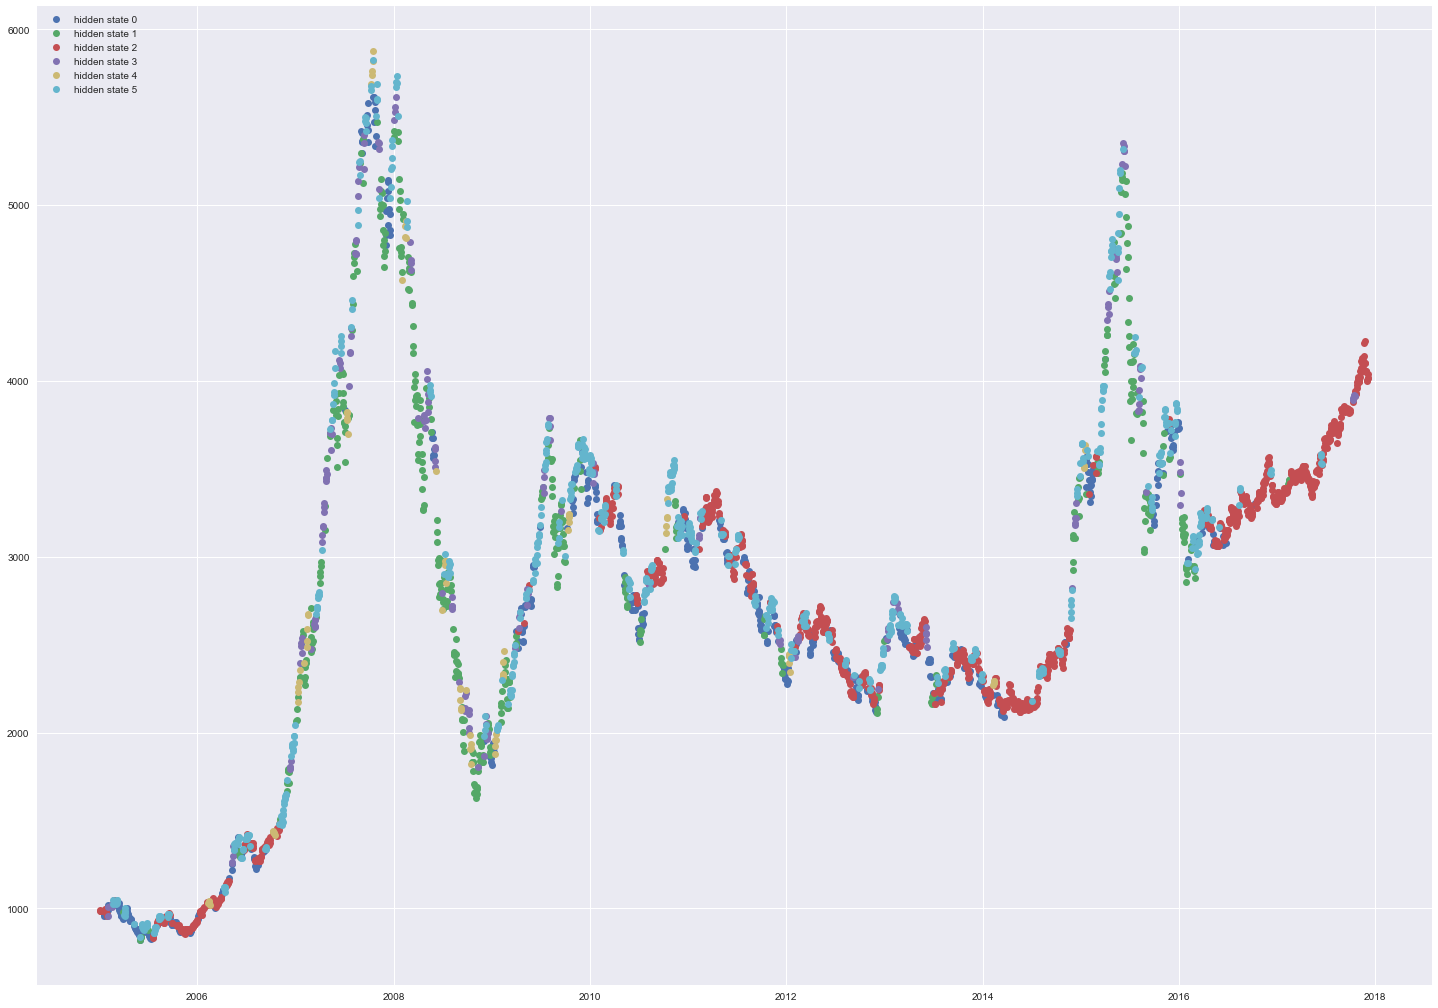

In [91]:
plt.figure(figsize=(25,18))

for i in range(model.n_components):
    pos=(hidden_states==i)
    plt.plot_date(Date[pos],close[pos],'o',label="hidden state %d"%i,lw=2)
    plt.legend(loc='upper left')


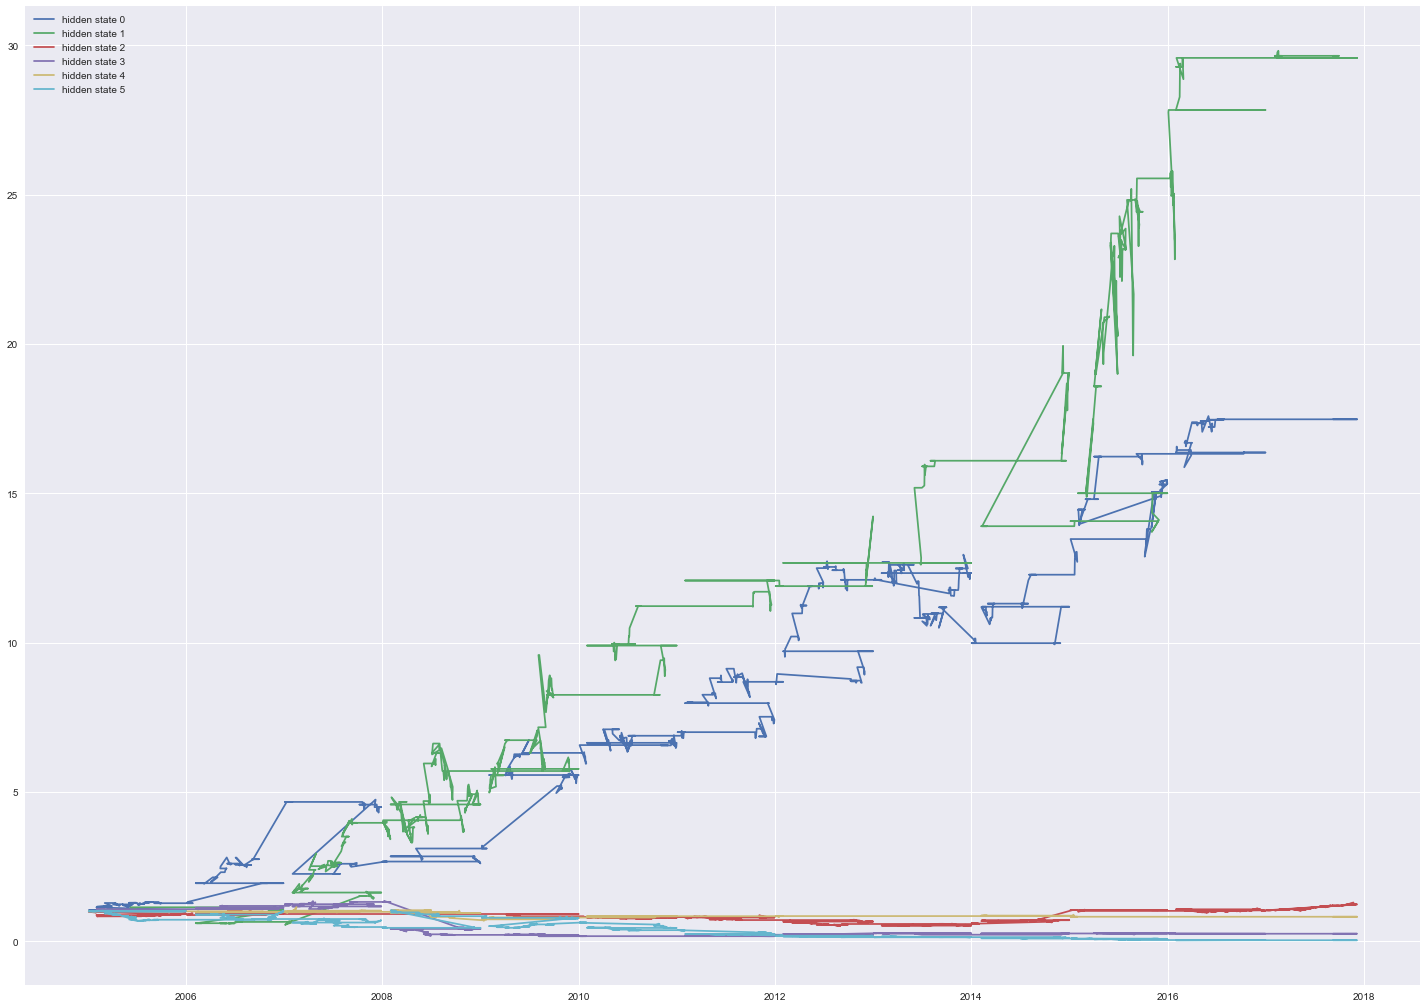

In [94]:
res=pd.DataFrame({"Date":Date,"logRet_1":logRet_1,"state":hidden_states}).set_index("Date")
plt.figure(figsize=(25,18))
for i in range(model.n_components):
    pos=(hidden_states==i)
    pos=np.append(0,pos[:-1])
    df=res.logRet_1
    res['state_ret%s'%i]=df.multiply(pos)
    plt.plot_date(Date,np.exp(res['state_ret%s'%i].cumsum()),'-',label='hidden state %d'%i)
    plt.legend(loc='upper left')

In [97]:
long_=(hidden_states==0)+(hidden_states==1)
short_=(hidden_states==3)+(hidden_states==5)
long_=np.append(0,long_[:-1])
short_=np.append(0,short_[:-1])

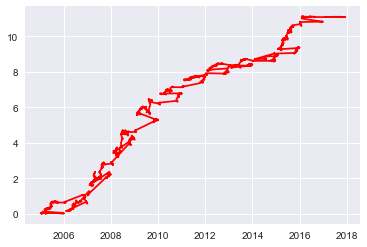

In [116]:
res['ret']=df.multiply(long_)- df.multiply(short_)
plt.plot_date(Date,res['ret'].cumsum(),'r-')

In [120]:
import lightgbm as lgb

In [124]:
gbm=lgb.train(df)

TypeError: train() missing 1 required positional argument: 'train_set'